# IMDB Data cleaning and processing
### Goal: combine all IMDB data, replace "nulls" with nan, keep only useful features, process text,  and output to csv

_____
## Import libraries and data

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import imdb
import pandas as pd
import time
import numpy as np

In [2]:
imdb_data_1 = pd.read_csv("imdb_full_dataset_0_35999.csv")
imdb_data_2 = pd.read_csv("imdb_full_dataset_36000_36599.csv")
print(imdb_data_1.shape)
print(imdb_data_2.shape)

(25745, 46)
(324, 46)


In [3]:
frames = [imdb_data_1, imdb_data_2]
result = pd.concat(frames)
result.shape

(26069, 46)

## Replace nulls with nan

In [4]:
result_nona = result.replace(to_replace="null", value=np.nan, inplace=False)

In [5]:
result_nona.head()

,Unnamed: 0,id,title,canonical title,imdbIndex,kind,year,rating,mpaa,votes,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,0,tt0000159,NaN,NaN,NaN,movie,1897,5.5,NaN,23,...,1,0,0,0,0,0,0,0,0,0
1,1,tt0000598,Hamlet,Hamlet,NaN,movie,1907,5.3,NaN,18,...,1,0,0,0,0,0,0,0,0,0
2,2,tt0000709,Julius Caesar,Julius Caesar,I,movie,1908,5.8,NaN,12,...,1,0,0,0,0,0,0,0,1,0
3,3,tt0001078,Two Memories,Two Memories,NaN,movie,1909,6.6,NaN,5,...,1,0,0,0,0,0,0,0,0,0
4,4,tt0002031,As You Like It,As You Like It,NaN,movie,1912,5.2,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check the distribution of genres

In [6]:
genres = result_nona.ix[:,20:]
genres_nona = genres.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
genres_nona = genres_nona.astype(int)
genres_nona.describe()

,Action,Adventure,Adult,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
count,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,...,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000,23589.000000
mean,0.082920,0.063080,0.033829,0.056764,0.279537,0.088813,0.096062,0.395820,0.072195,0.038281,...,0.143245,0.064606,0.024927,0.034889,0.024800,0.008267,0.010683,0.007080,0.016872,0.012379
std,0.275767,0.243112,0.180793,0.231396,0.448781,0.284479,0.294682,0.489036,0.258815,0.191877,...,0.350330,0.245835,0.155906,0.183503,0.155518,0.090546,0.102807,0.083844,0.128796,0.110571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
bars = genres_nona.describe().ix[1,]

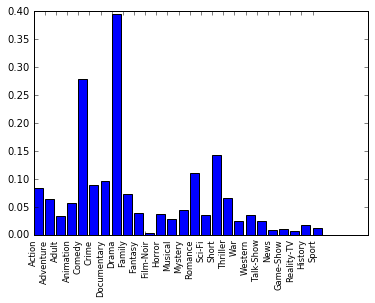

In [8]:
plt.bar(range(len(genres.columns)), bars.values)
plt.xticks(range(len(genres.columns)), genres.columns, size='small')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## Which features should we keep?

Likely to be helpful:
- Rating
- Votes
- Color info
- Languages
- Countries

Possibly helpful:
- Director
- Writer
- Cast

Probably not helpful:
- IMDB Index: mostly nulls
- MPAA: mostly nulls
- Certificate: mostly nulls
- Title: already getting this from TMDB
- Year: already getting from TMDB
- Runtimes: already getting from TMDB
- Plot: already getting "overview" from TMDB

## Keep only Rating, Votes, Color Info, Languages, Countries, Director, Writer, and Cast

In [67]:
imdb_useful = result_nona[['id', 'title', 'rating', 'votes', 'color info', 'languages', 'countries', 'director','writer','cast']]

In [68]:
imdb_useful.shape

(26069, 10)

## We need to process Color Info, Languages, Countries, Director, Writer, and Cast

### Process languages

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
def bagOfWords(column_name, max_features):
    count = 0
    all_words = []
    print column_name
    for i in imdb_useful[column_name]:
        i=str(i).replace(" ", "")
        try:
            all_words.append(i.decode('utf-8'))
        except:
            all_words.append('')
    print("Word examples",all_words[10:20])
    vectorizer = CountVectorizer(stop_words = 'english', max_features=max_features)
    all_data_features = vectorizer.fit_transform(all_words).todense()
    all_feature_names = [column_name + '_' +i.encode('utf-8') for i in vectorizer.get_feature_names()]
    print "Feature names", all_feature_names[:10]
    for i in range(len(all_feature_names)):
        imdb_useful[all_feature_names[i]] = all_data_features[:,i]
    del imdb_useful[column_name]
    print(" ")

In [91]:
imdb_useful = result_nona[['id', 'title', 'rating', 'votes', 'color info', 'languages', 'countries', 'director','writer','cast']]
for column_name in ['color info', 'languages', 'countries']:
    bagOfWords(column_name, max_features=100)

color info
('Word examples', [u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']"])
Feature names ['color info_16mmversion', 'color info_1966', 'color info_1969', 'color info_35mmversion', 'color info_agfacolor', 'color info_alphacine', 'color info_anscocolor', 'color info_archivefilms', 'color info_archivefootage', 'color info_ascolorbypath']


/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 
languages
('Word examples', [u"[u'English']", u"[u'English']", u'nan', u'nan', u"[u'None']", u"[u'English']", u"[u'English']", u'nan', u"[u'English']", u"[u'English']"])
Feature names ['languages_afrikaans', 'languages_albanian', 'languages_americansignlanguage', 'languages_ancient', 'languages_arabic', 'languages_armenian', 'languages_assamese', 'languages_bambara', 'languages_basque', 'languages_bengali']
 
countries
('Word examples', [u"[u'USA']", u"[u'USA']", u"[u'UK']", u"[u'UK']", u"[u'Argentina']", u"[u'USA']", u"[u'USA']", u"[u'USA']", u"[u'USA']", u"[u'USA']"])
Feature names ['countries_albania', 'countries_algeria', 'countries_argentina', 'countries_armenia', 'countries_australia', 'countries_austria', 'countries_bangladesh', 'countries_belgium', 'countries_bolivia', 'countries_bosniaandherzegovina']
 


In [92]:
for column_name in ['director', 'writer', 'cast']:
    bagOfWords(column_name, max_features=100)

director
('Word examples', [u"['WilliamS.Hart','CliffordSmith']", u"['LawrenceB.McGill']", u"['MauriceElvey']", u"['CecilM.Hepworth']", u"['QuirinoCristiani']", u"['HarryA.Gant']", u"['FredNiblo']", u"['GeorgeIrving']", u"['WesleyRuggles']", u"['SidneyOlcott']"])
Feature names ['director_alanj', 'director_albertomariscal', 'director_albertopieralisi', 'director_alberts', 'director_alfrede', 'director_alfredob', 'director_allandwan', 'director_amato', 'director_anderson', 'director_anthonycaleca']
 
writer
('Word examples', [u"['ThomasH.Ince','ThomasH.Ince','S.BarretMcCormick','S.BarretMcCormick']", u"['BurnsMantle']", u"['KenelmFoss','WilliamShakespeare']", u"['AlmaTaylor']", u"['QuirinoCristiani']", u"['GeorgeJohnson','DoraMitchell']", u"['BrianOswaldDonn-Byrne','C.GardnerSullivan']", u"['GeorgeM.Arthur','EdmundGoulding']", u"['StewartEdwardWhite']", u"['KathrynStuart','KateDouglasWiggin']"])
Feature names ['writer_adelebuffington', 'writer_albertdemond', 'writer_alekossakellarios', '

### Output data to csv

In [93]:
imdb_useful.shape

(26069, 604)

In [94]:
imdb_useful.head()

,id,title,rating,votes,color info_16mmversion,color info_1966,color info_1969,color info_35mmversion,color info_agfacolor,color info_alphacine,...,cast_tomlondon,cast_victoradamson,cast_wai,cast_wallywest,cast_wilfredlucas,cast_williamh,cast_williams,cast_wilson,cast_yi,cast_yu
0,tt0000159,NaN,5.5,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0000598,Hamlet,5.3,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000709,Julius Caesar,5.8,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0001078,Two Memories,6.6,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0002031,As You Like It,5.2,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
imdb_useful.to_csv("imdb_full_dataset_clean_0_36599.csv")